In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib notebook

%matplotlib inline

In [217]:
bank = pd.read_csv('/Users/prachisadarangani/Documents/Syracuse University /fALL 2023 SEM 3/AML/Assignment 3/bankdata_csv_all.csv')

In [218]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [219]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#preprocessing the data
#converting categorical values into dummies

bank_new = pd.get_dummies(bank, columns=['married','car','save_act','current_act','mortgage','pep'], drop_first = True)
bank_new = pd.get_dummies(bank_new, columns=['region','sex'], drop_first = True)

bank_new = bank_new.drop('id', axis =1)
Y= bank_new['pep_YES']
bank_new1 = bank_new.drop('pep_YES', axis =1)
bank_np = bank_new1.to_numpy()

In [220]:
bank_new1

,age,income,children,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,region_RURAL,region_SUBURBAN,region_TOWN,sex_MALE
0,48,17546.00,1,0,0,0,0,0,0,0,0,0
1,40,30085.10,3,1,1,0,1,1,0,0,1,1
2,51,16575.40,0,1,1,1,1,0,0,0,0,0
3,23,20375.40,3,1,0,0,1,0,0,0,1,0
4,57,50576.30,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,0,1,1,1,1,0,0,0,0
596,30,9672.25,0,1,1,1,1,0,0,0,0,0
597,31,15976.30,0,1,1,1,0,0,0,0,1,0
598,29,14711.80,0,1,0,1,0,1,0,0,0,1


In [221]:
#scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
bank_sc = bank_new1
bank_num = ['age', 'income', 'children']
bank_sc[bank_num] = sc.fit_transform(bank_new1[bank_num])


In [222]:
bank_sc

,age,income,children,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,region_RURAL,region_SUBURBAN,region_TOWN,sex_MALE
0,0.388887,-0.774168,-0.011049,0,0,0,0,0,0,0,0,0
1,-0.166170,0.198706,1.883121,1,1,0,1,1,0,0,1,1
2,0.597034,-0.849474,-0.958135,1,1,1,1,0,0,0,0,0
3,-1.345667,-0.554643,1.883121,1,0,0,1,0,0,0,1,0
4,1.013327,1.788562,-0.958135,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.290856,1.513027,0.936036,0,1,1,1,1,0,0,0,0
596,-0.859992,-1.385071,-0.958135,1,1,1,1,0,0,0,0,0
597,-0.790610,-0.895957,-0.958135,1,1,1,0,0,0,0,1,0
598,-0.929374,-0.994066,-0.958135,1,0,1,0,1,0,0,0,1


In [223]:
pca = PCA()
bank_pca = pca.fit_transform(bank_sc)

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PC2')

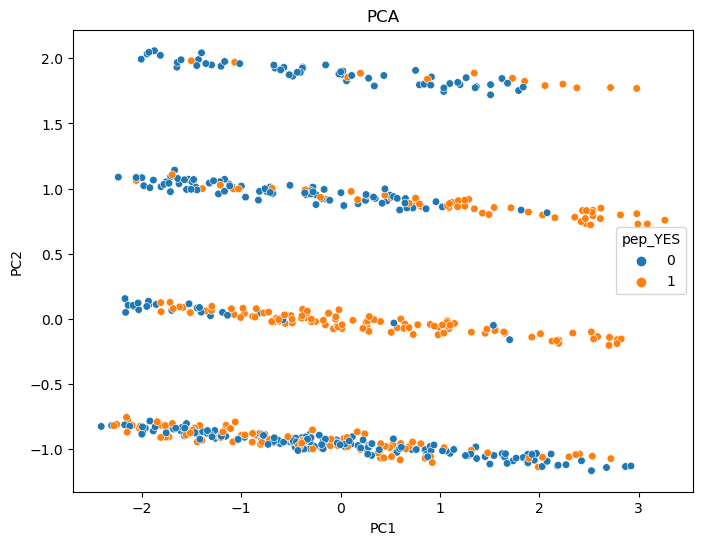

In [224]:
#plotting the PCA graph
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(bank_pca[:, 0], bank_pca[:, 1], hue = bank_new['pep_YES'], s=30)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [225]:
#lets find the inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(bank_pca1)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

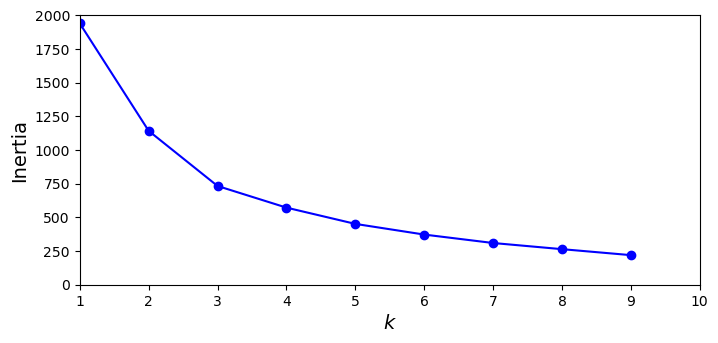

In [226]:
#lets use elbow meethod to see how many clusters do we require

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10, 0, 2000])

plt.show()

#we can see that the elbow is at 2 or 3 


In [227]:
#lets make 3 clusters
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(bank_pca)
pred = kmeans.predict(bank_pca)

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

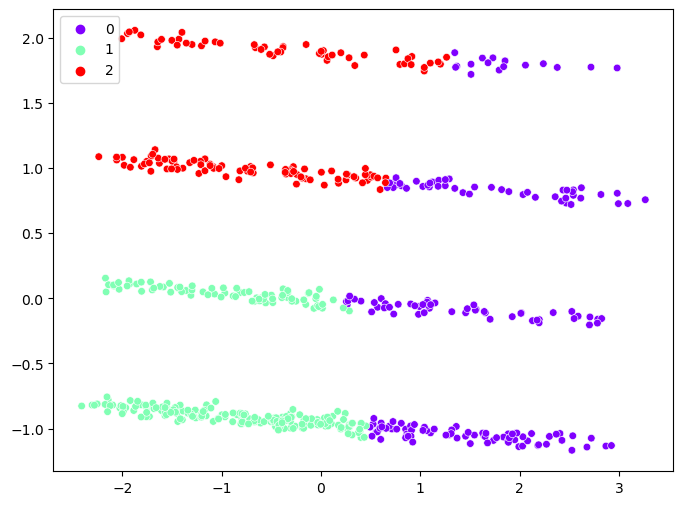

In [228]:
#plotting
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(bank_pca[:, 0], bank_pca[:, 1], hue = pred, palette='rainbow', s=30)

In [229]:
#lets check the inertia of this 
kmeans.inertia_

1827.3230545856466

In [230]:
from sklearn.metrics import silhouette_score

In [231]:
silhouette_score(bank_pca1, kmeans.labels_)

0.10645466181447036

In [232]:
silhouette_scores = [silhouette_score(bank_pca1, model.labels_)
                     for model in kmeans_per_k[1:]]

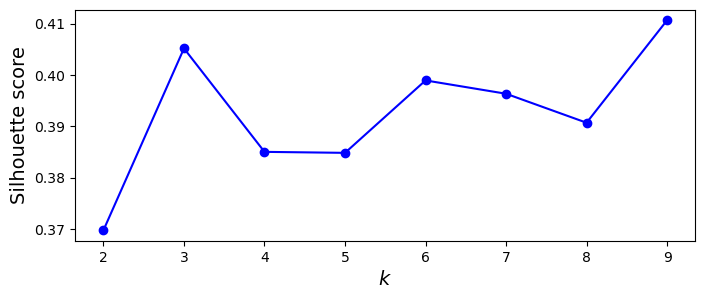

In [233]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [234]:
#lets make 9 clusters
kmeans = KMeans(n_clusters = 9,random_state = 42)
kmeans.fit(bank_pca)
pred = kmeans.predict(bank_pca)

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

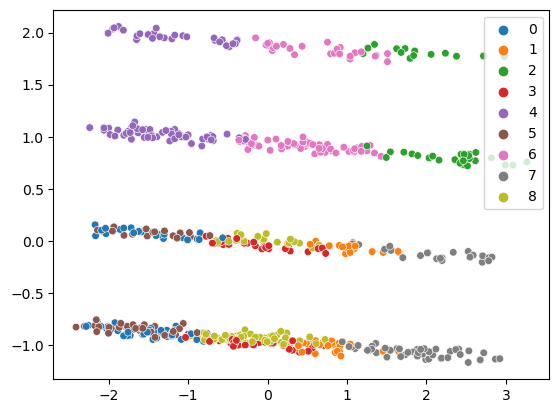

In [235]:
#plotting
sns.scatterplot(bank_pca[:, 0], bank_pca[:, 1], hue = pred, palette='tab10', s=30)

In [240]:
bank_new['kmeans labels'] = kmeans.labels_

In [244]:

cluster_1 = bank_new[bank_new['kmeans labels'] == 1]
cluster_1_pep = cluster_1[cluster_1['pep_YES'] == 1]


In [247]:
pd.set_option('display.max_rows', None)
cluster_1_pep


,age,income,children,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES,region_RURAL,region_SUBURBAN,region_TOWN,sex_MALE,kmeans labels
18,62,26909.2,0,1,0,1,0,0,1,0,0,0,0,1
29,61,24270.1,1,1,0,0,1,0,1,1,0,0,1,1
56,58,24977.5,0,0,0,0,1,0,1,0,0,0,0,1
61,65,36589.0,1,0,1,0,1,0,1,0,0,0,0,1
84,62,24026.1,0,1,0,0,1,1,1,0,0,0,1,1
92,53,34866.5,0,0,0,0,1,0,1,1,0,0,0,1
104,64,34513.6,1,1,0,1,1,0,1,0,0,0,0,1
135,53,31334.8,1,1,1,1,1,0,1,0,0,1,0,1
150,53,28193.6,1,1,1,1,1,0,1,1,0,0,1,1
158,60,21506.2,0,1,0,0,1,0,1,0,0,1,0,1


In [248]:
cluster_1_pep['income'].mean()

29513.00277777778

In [251]:
cluster_2 = bank_new[bank_new['kmeans labels'] == 2]
cluster_2_pep = cluster_2[cluster_2['pep_YES'] == 1]
cluster_2_pep

,age,income,children,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES,region_RURAL,region_SUBURBAN,region_TOWN,sex_MALE,kmeans labels
20,61,57880.7,2,1,0,1,0,0,1,0,0,0,1,2
42,67,55716.5,2,0,1,1,0,0,1,0,0,1,1,2
45,64,52670.6,2,1,0,1,1,1,1,0,0,0,1,2
55,52,47835.8,3,0,0,1,0,0,1,1,0,0,0,2
74,64,52674.0,2,0,1,1,1,0,1,0,0,0,0,2
119,64,45765.0,3,1,1,1,1,0,1,1,0,0,0,2
124,47,45031.9,3,0,1,1,0,0,1,1,0,0,1,2
134,66,59503.8,2,1,1,1,1,1,1,0,0,1,0,2
152,63,54618.8,2,1,0,1,0,1,1,0,0,1,1,2
174,67,41558.1,2,1,0,1,1,0,1,0,0,1,0,2


In [252]:
cluster_2_pep['income'].mean()

51414.26250000001

In [258]:
cluster_5 = bank_new[bank_new['kmeans labels'] == 5]
cluster_5_pep = cluster_5[cluster_5['pep_YES'] == 1]
cluster_5_pep

,age,income,children,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES,region_RURAL,region_SUBURBAN,region_TOWN,sex_MALE,kmeans labels
57,28,23124.90,0,1,0,1,1,0,1,0,0,0,1,5
83,35,16394.40,1,1,0,1,1,0,1,0,0,0,1,5
108,23,12681.90,0,0,0,1,1,0,1,0,0,0,1,5
129,27,21350.30,0,0,1,1,1,0,1,1,0,0,0,5
144,25,18923.00,1,1,0,1,1,0,1,0,0,0,1,5
180,22,17655.00,1,1,0,1,1,1,1,0,0,0,0,5
199,26,20819.00,0,1,0,1,1,0,1,0,0,0,0,5
204,22,12764.80,1,1,0,1,1,1,1,0,0,0,1,5
209,27,20771.90,0,0,0,1,0,0,1,0,0,0,1,5
212,22,14433.40,0,1,1,1,1,0,1,0,0,0,1,5


In [259]:
cluster_5_pep['income'].mean()

17533.830416666664

In [26]:
silhouette_score(bank_pca1, kmeans.labels_)

0.44740877348899516

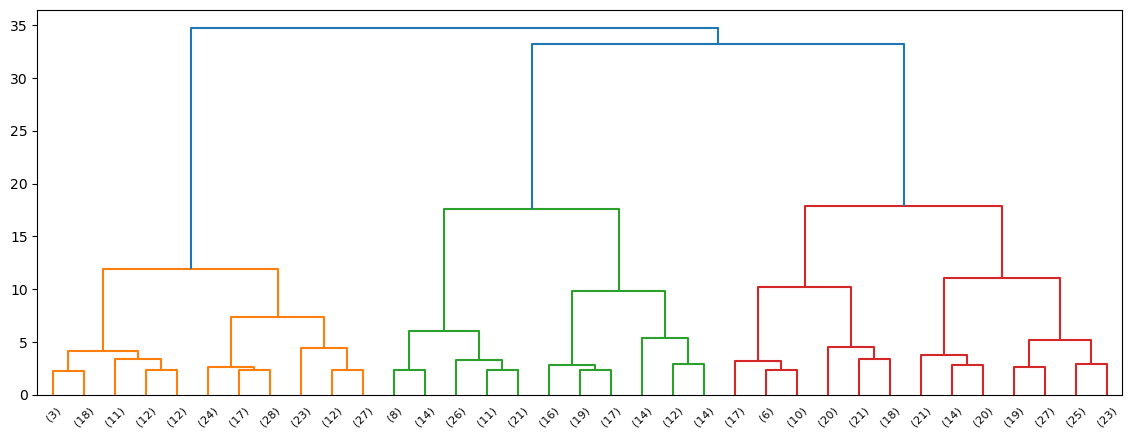

In [262]:
#now lets use the HAC method
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_array = linkage(bank_pca1,'ward')

fig = plt.figure(figsize=(14, 5))
dendrogram(linkage_array, truncate_mode='lastp', p=35 )
plt.show()


In [264]:
bank_new['clusters'] = fcluster(linkage_array, t=3, criterion='maxclust')

In [265]:
bank_new

,age,income,children,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES,region_RURAL,region_SUBURBAN,region_TOWN,sex_MALE,kmeans labels,clusters
0,48,17546.00,1,0,0,0,0,0,1,0,0,0,0,8,1
1,40,30085.10,3,1,1,0,1,1,0,0,0,1,1,6,2
2,51,16575.40,0,1,1,1,1,0,0,0,0,0,0,8,3
3,23,20375.40,3,1,0,0,1,0,0,0,0,1,0,4,1
4,57,50576.30,0,1,0,1,0,0,0,1,0,0,0,7,3
5,57,37869.60,2,1,0,1,1,0,1,0,0,1,0,6,2
6,22,8877.07,0,0,0,0,1,0,1,1,0,0,1,0,1
7,58,24946.60,0,1,1,1,1,0,0,0,0,1,1,1,2
8,37,25304.30,2,1,1,0,0,0,0,0,1,0,0,6,1
9,54,24212.10,2,1,1,1,1,0,0,0,0,1,1,6,2


# PART 3 

In [95]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

bank_new2 = bank_new
bank_new2['age category'] = pd.cut(bank_new2['age'], bins = [10,30,60,70], 
                              labels =['10 to 30', '30 to 60', '60+'])

bank_new2['income category'] = pd.cut(bank_new2['income'], bins = [5000,20000,45000,70000], 
                              labels =['lower class income', 'middle class income', 'upper class income'])

bank_new2 = pd.get_dummies(bank_new2, columns=['age category','income category','children'], drop_first = True)


bank_new2 = bank_new2.drop('income', axis =1)
bank_new2 = bank_new2.drop('age', axis =1)

#association rule 
frequent_itemsets = apriori(bank_new2, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

print(rules)

                                           antecedents  \
0                                        (married_YES)   
1                                            (car_YES)   
2                                        (married_YES)   
3                                       (save_act_YES)   
4                                        (married_YES)   
..                                                 ...   
279  (age category_30 to 60, income category_middle...   
280                                  (current_act_YES)   
281                                     (save_act_YES)   
282                            (age category_30 to 60)   
283              (income category_middle class income)   

                                           consequents  antecedent support  \
0                                            (car_YES)            0.660000   
1                                        (married_YES)            0.493333   
2                                       (save_act_YES)            0.6

/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [96]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(married_YES),(car_YES),0.660000,0.493333,0.323333,0.489899,0.993038,-0.002267,0.993267,-0.020202
1,(car_YES),(married_YES),0.493333,0.660000,0.323333,0.655405,0.993038,-0.002267,0.986667,-0.013647
2,(married_YES),(save_act_YES),0.660000,0.690000,0.461667,0.699495,1.013761,0.006267,1.031597,0.039924
3,(save_act_YES),(married_YES),0.690000,0.660000,0.461667,0.669082,1.013761,0.006267,1.027445,0.043787
4,(married_YES),(current_act_YES),0.660000,0.758333,0.488333,0.739899,0.975691,-0.012167,0.929126,-0.068275


In [97]:
rules_with_pep = rules[rules['consequents'] == {'pep_YES'}]
rules_with_pep.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(married_YES),(pep_YES),0.660000,0.456667,0.256667,0.388889,0.851582,-0.044733,0.889091,-0.338889
20,(car_YES),(pep_YES),0.493333,0.456667,0.230000,0.466216,1.020911,0.004711,1.017890,0.040427
32,(save_act_YES),(pep_YES),0.690000,0.456667,0.298333,0.432367,0.946789,-0.016767,0.957191,-0.153471
44,(current_act_YES),(pep_YES),0.758333,0.456667,0.351667,0.463736,1.015481,0.005361,1.013183,0.063082
56,(sex_MALE),(pep_YES),0.500000,0.456667,0.240000,0.480000,1.051095,0.011667,1.044872,0.097222


In [99]:
sorted_pep_rules_confidence = rules_with_pep.sort_values(by='confidence', ascending=False)
sorted_pep_rules_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
206,"(current_act_YES, age category_30 to 60)",(pep_YES),0.440000,0.456667,0.215000,0.488636,1.070007,0.014067,1.062519,0.116833
56,(sex_MALE),(pep_YES),0.500000,0.456667,0.240000,0.480000,1.051095,0.011667,1.044872,0.097222
58,(age category_30 to 60),(pep_YES),0.590000,0.456667,0.281667,0.477401,1.045404,0.012233,1.039676,0.105932
230,"(age category_30 to 60, income category_middle...",(pep_YES),0.433333,0.456667,0.203333,0.469231,1.027513,0.005444,1.023671,0.047252
20,(car_YES),(pep_YES),0.493333,0.456667,0.230000,0.466216,1.020911,0.004711,1.017890,0.040427
44,(current_act_YES),(pep_YES),0.758333,0.456667,0.351667,0.463736,1.015481,0.005361,1.013183,0.063082
60,(income category_middle class income),(pep_YES),0.548333,0.456667,0.253333,0.462006,1.011692,0.002928,1.009925,0.025587
170,"(current_act_YES, save_act_YES)",(pep_YES),0.531667,0.456667,0.233333,0.438871,0.961032,-0.009461,0.968287,-0.079680
32,(save_act_YES),(pep_YES),0.690000,0.456667,0.298333,0.432367,0.946789,-0.016767,0.957191,-0.153471
8,(married_YES),(pep_YES),0.660000,0.456667,0.256667,0.388889,0.851582,-0.044733,0.889091,-0.338889


In [89]:
sorted_pep_rules_support = rules_with_pep.sort_values(by='support', ascending=False)
sorted_pep_rules_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,(current_act_YES),(pep_YES),0.758333,0.456667,0.351667,0.463736,1.015481,0.005361,1.013183,0.063082
32,(save_act_YES),(pep_YES),0.690000,0.456667,0.298333,0.432367,0.946789,-0.016767,0.957191,-0.153471
58,(age category_30 to 60),(pep_YES),0.590000,0.456667,0.281667,0.477401,1.045404,0.012233,1.039676,0.105932
8,(married_YES),(pep_YES),0.660000,0.456667,0.256667,0.388889,0.851582,-0.044733,0.889091,-0.338889
60,(income category_middle class income),(pep_YES),0.548333,0.456667,0.253333,0.462006,1.011692,0.002928,1.009925,0.025587
56,(sex_MALE),(pep_YES),0.500000,0.456667,0.240000,0.480000,1.051095,0.011667,1.044872,0.097222
170,"(current_act_YES, save_act_YES)",(pep_YES),0.531667,0.456667,0.233333,0.438871,0.961032,-0.009461,0.968287,-0.079680
20,(car_YES),(pep_YES),0.493333,0.456667,0.230000,0.466216,1.020911,0.004711,1.017890,0.040427
206,"(current_act_YES, age category_30 to 60)",(pep_YES),0.440000,0.456667,0.215000,0.488636,1.070007,0.014067,1.062519,0.116833
230,"(age category_30 to 60, income category_middle...",(pep_YES),0.433333,0.456667,0.203333,0.469231,1.027513,0.005444,1.023671,0.047252


In [90]:
sorted_pep_rules_lift = rules_with_pep.sort_values(by='lift', ascending=False)
sorted_pep_rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
206,"(current_act_YES, age category_30 to 60)",(pep_YES),0.440000,0.456667,0.215000,0.488636,1.070007,0.014067,1.062519,0.116833
56,(sex_MALE),(pep_YES),0.500000,0.456667,0.240000,0.480000,1.051095,0.011667,1.044872,0.097222
58,(age category_30 to 60),(pep_YES),0.590000,0.456667,0.281667,0.477401,1.045404,0.012233,1.039676,0.105932
230,"(age category_30 to 60, income category_middle...",(pep_YES),0.433333,0.456667,0.203333,0.469231,1.027513,0.005444,1.023671,0.047252
20,(car_YES),(pep_YES),0.493333,0.456667,0.230000,0.466216,1.020911,0.004711,1.017890,0.040427
44,(current_act_YES),(pep_YES),0.758333,0.456667,0.351667,0.463736,1.015481,0.005361,1.013183,0.063082
60,(income category_middle class income),(pep_YES),0.548333,0.456667,0.253333,0.462006,1.011692,0.002928,1.009925,0.025587
170,"(current_act_YES, save_act_YES)",(pep_YES),0.531667,0.456667,0.233333,0.438871,0.961032,-0.009461,0.968287,-0.079680
32,(save_act_YES),(pep_YES),0.690000,0.456667,0.298333,0.432367,0.946789,-0.016767,0.957191,-0.153471
8,(married_YES),(pep_YES),0.660000,0.456667,0.256667,0.388889,0.851582,-0.044733,0.889091,-0.338889
